>> ## Quantitative analysis for AMZN

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
5,1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.0,0.0
6,1997-05-23,0.070313,0.076042,0.066667,0.075000,0.075000,318744000,0.0,0.0
7,1997-05-27,0.075521,0.082292,0.072917,0.079167,0.079167,173952000,0.0,0.0
8,1997-05-28,0.081250,0.081771,0.076563,0.076563,0.076563,91488000,0.0,0.0
9,1997-05-29,0.077083,0.077083,0.073958,0.075260,0.075260,69456000,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.edaAndQuantitativeAnalysis import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
validate_columns(data, required_columns)  

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


>>> #####  Handle missing values

In [6]:
from scripts.edaAndQuantitativeAnalysis import handle_missing_values

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


>>> ##### Analyze statistics

In [7]:
from scripts.edaAndQuantitativeAnalysis import analyze_statistics
  
analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

              Open         High          Low    Adj Close        Close  \
count  6846.000000  6846.000000  6846.000000  6846.000000  6846.000000   
mean     37.360464    37.801009    36.882561    37.351096    37.351096   
std      53.756955    54.366449    53.087051    53.729913    53.729913   
min       0.070313     0.072396     0.065625     0.069792     0.069792   
25%       2.070125     2.120625     2.040156     2.076750     2.076750   
50%       8.574500     8.666750     8.466500     8.591500     8.591500   
75%      50.453876    50.723249    50.059875    50.426500    50.426500   
max     200.089996   201.199997   199.050003   200.000000   200.000000   

             Volume  
count  6.846000e+03  
mean   1.380713e+08  
std    1.382346e+08  
min    9.744000e+06  
25%    6.505442e+07  
50%    1.020650e+08  
75%    1.567560e+08  
max    2.086584e+09  


>>> ##### visualize distribution 

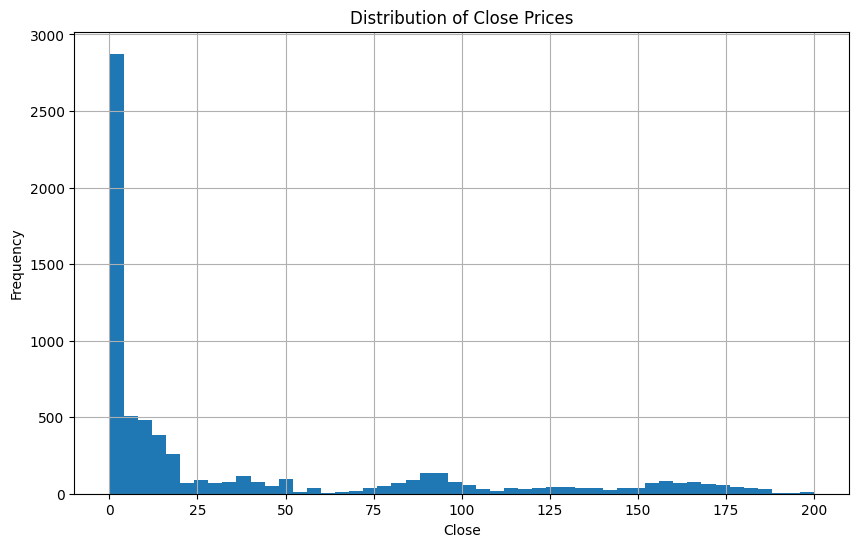

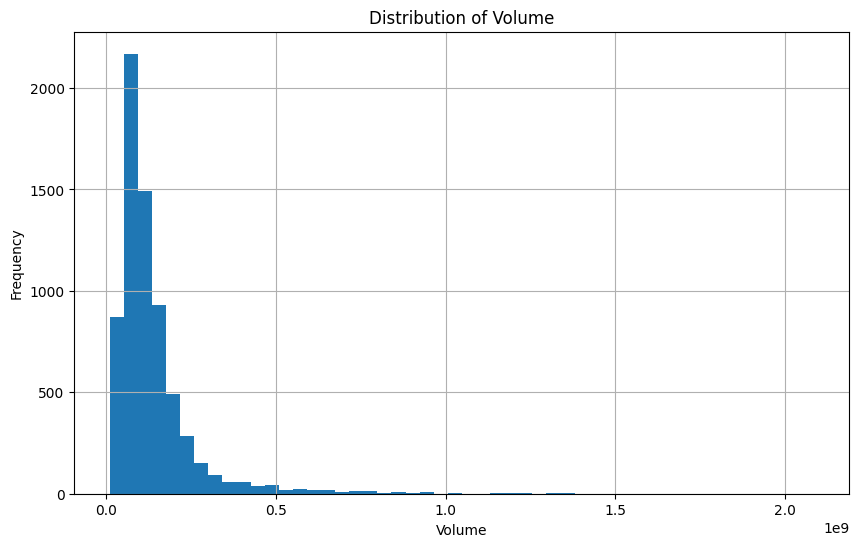

In [8]:
from scripts.edaAndQuantitativeAnalysis import plot_distributions
plot_distributions(data, 'Close', title="Distribution of Close Prices")
plot_distributions(data, 'Volume', title="Distribution of Volume")

>>> ##### Analyze correlation


Correlation Matrix:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999921  0.999904   0.999805  0.999805 -0.297579
High       0.999921  1.000000  0.999885   0.999908  0.999908 -0.296579
Low        0.999904  0.999885  1.000000   0.999914  0.999914 -0.298666
Adj Close  0.999805  0.999908  0.999914   1.000000  1.000000 -0.297628
Close      0.999805  0.999908  0.999914   1.000000  1.000000 -0.297628
Volume    -0.297579 -0.296579 -0.298666  -0.297628 -0.297628  1.000000


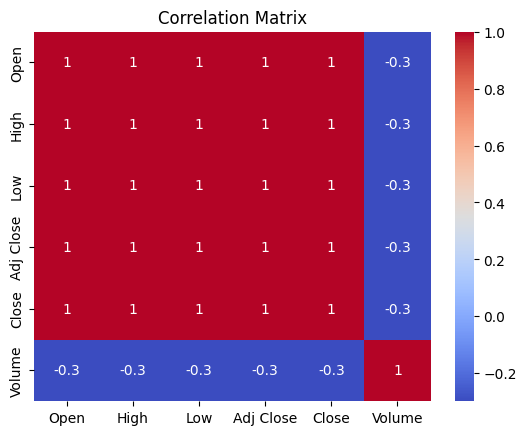

In [9]:
from scripts.edaAndQuantitativeAnalysis import analyze_correlations
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

>>> ##### study volatility

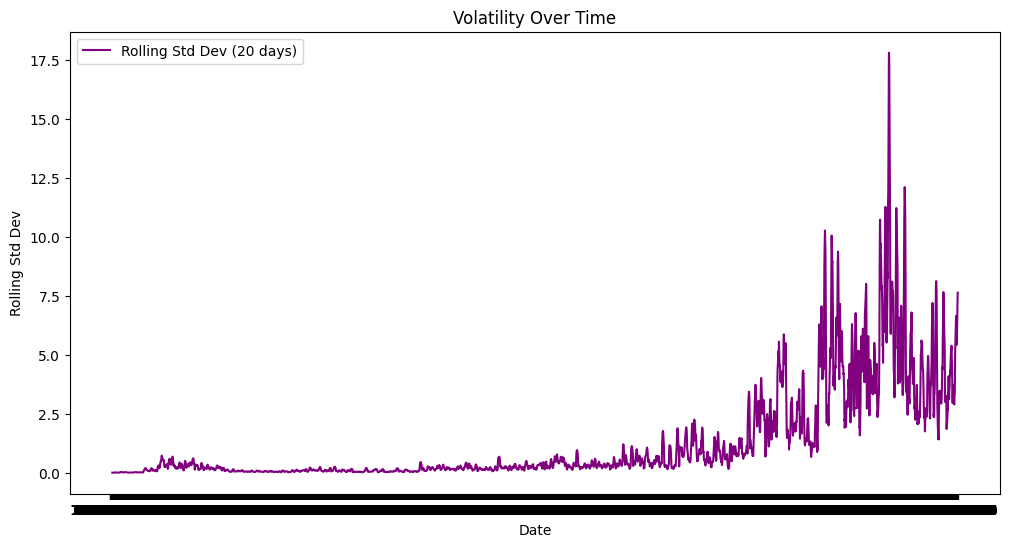

In [10]:
from scripts.edaAndQuantitativeAnalysis import plot_volatility
plot_volatility(data, 'Close', 'Date')